# Set Up

导入需要的模块

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk.tokenize import WordPunctTokenizer

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold

import torch
import torch.nn as nn
from torch.autograd import Variable

import stats

读取训练集数据和测试集数据并定义分词器

In [3]:
TRAIN_FILE = '../data/processed_train.csv'
TEST_FILE = '../data/processed_test.csv'

train_data = pd.read_csv(TRAIN_FILE)
test_data = pd.read_csv(TEST_FILE)
word_tokenizer = WordPunctTokenizer()

def bigram_tokenize(text):
    bigrams = []
    unigrams = word_tokenizer.tokenize(text)
    for i in range(len(unigrams) - 1):
        bigrams.append('-'.join([unigrams[i], unigrams[i+1]]))
    return bigrams

简单查看分词情况

In [4]:
# count totally how many unique word in the whole train dataset and test dataset
print('TRAIN')
stats.displayStatsInfo(TRAIN_FILE)

print('\nTEST')
stats.displayStatsInfo(TEST_FILE)

TRAIN

Analysis Statistics
Tweets => Total: 11712, Positive: 1919, Neutral: 2514, Negative: 7279
User Mentions => Total: 13246, Avg: 1.1310, Max: 6
URLs => Total: 972, Avg: 0.0830, Max: 3
Emojis => Total: 291, Positive: 204, Negative: 87, Avg: 0.0248, Max: 3
Unigrams => Total: 11712, Unique: 11594, Avg: 20.8228, Max: 47, Min: 2
Bigrams => Total: 232165, Unique: 84517, Avg: 19.8228

TEST

Analysis Statistics
Tweets => Total: 2928, Positive: 444, Neutral: 585, Negative: 1899
User Mentions => Total: 3259, Avg: 1.1130, Max: 5
URLs => Total: 239, Avg: 0.0816, Max: 2
Emojis => Total: 60, Positive: 45, Negative: 15, Avg: 0.0205, Max: 2
Unigrams => Total: 2928, Unique: 5564, Avg: 20.9822, Max: 46, Min: 2
Bigrams => Total: 58508, Unique: 30751, Avg: 19.9822


定义训练集和测试集的标签/目标

In [5]:
train_targets = train_data.sentiment
test_targets = test_data.sentiment

# Naive Bayes

文本特征提取：词频向量化 + TF-IDF 处理

In [6]:
countVzer = CountVectorizer(min_df=7, max_df=0.5, tokenizer=word_tokenizer.tokenize)
train_counts = countVzer.fit_transform(train_data.text)
test_counts = countVzer.transform(test_data.text)
tfidfTfmer = TfidfTransformer(smooth_idf=True, sublinear_tf=True, use_idf=True)
train_tfidfs = tfidfTfmer.fit_transform(train_counts)
test_tfidfs = tfidfTfmer.transform(test_counts)
print('feature dimension: {}'.format(train_counts.shape[1]))

feature dimension: 2160


In [7]:
clf_NB = MultinomialNB(alpha=1.0e-10)
clf_NB.fit(train_counts, train_targets)
test_predicts = clf_NB.predict(test_counts)
print('Navie Bayes without Laplace Smoothing')
print(classification_report(test_targets, test_predicts))
print('Accuracy: {}'.format(accuracy_score(test_targets, test_predicts)))

Navie Bayes without Laplace Smoothing
              precision    recall  f1-score   support

    negative       0.84      0.87      0.85      1899
     neutral       0.56      0.52      0.54       585
    positive       0.68      0.62      0.65       444

   micro avg       0.76      0.76      0.76      2928
   macro avg       0.69      0.67      0.68      2928
weighted avg       0.76      0.76      0.76      2928

Accuracy: 0.7622950819672131


In [8]:
clf_NB = MultinomialNB(alpha=1.0)
clf_NB.fit(train_counts, train_targets)
test_predicts = clf_NB.predict(test_counts)
print('Navie Bayes with Laplace Smoothing')
print(classification_report(test_targets, test_predicts))
print('Accuracy: {}'.format(accuracy_score(test_targets, test_predicts)))

Navie Bayes with Laplace Smoothing
              precision    recall  f1-score   support

    negative       0.85      0.87      0.86      1899
     neutral       0.58      0.53      0.56       585
    positive       0.67      0.69      0.68       444

   micro avg       0.77      0.77      0.77      2928
   macro avg       0.70      0.70      0.70      2928
weighted avg       0.77      0.77      0.77      2928

Accuracy: 0.7721994535519126


In [9]:
clf_NB = MultinomialNB(alpha=1.0e-10)
clf_NB.fit(train_tfidfs, train_targets)
test_predicts = clf_NB.predict(test_tfidfs)
print('Navie Bayes without Laplace Smoothing (apply TF-IDF)')
print(classification_report(test_targets, test_predicts))
print('Accuracy: {}'.format(accuracy_score(test_targets, test_predicts)))

Navie Bayes without Laplace Smoothing (apply TF-IDF)
              precision    recall  f1-score   support

    negative       0.76      0.97      0.85      1899
     neutral       0.64      0.29      0.40       585
    positive       0.82      0.47      0.60       444

   micro avg       0.76      0.76      0.76      2928
   macro avg       0.74      0.58      0.62      2928
weighted avg       0.75      0.76      0.72      2928

Accuracy: 0.7564890710382514


In [10]:
clf_NB = MultinomialNB(alpha=1.0)
clf_NB.fit(train_tfidfs, train_targets)
test_predicts = clf_NB.predict(test_tfidfs)
print('Navie Bayes with Laplace Smoothing (apply TF-IDF)')
print(classification_report(test_targets, test_predicts))
print('Accuracy: {}'.format(accuracy_score(test_targets, test_predicts)))

Navie Bayes with Laplace Smoothing (apply TF-IDF)
              precision    recall  f1-score   support

    negative       0.74      0.98      0.85      1899
     neutral       0.75      0.24      0.36       585
    positive       0.86      0.44      0.58       444

   micro avg       0.75      0.75      0.75      2928
   macro avg       0.78      0.55      0.59      2928
weighted avg       0.76      0.75      0.71      2928

Accuracy: 0.7513661202185792


准确率最高大概在 0.77~0.78

# SVM

In [11]:
countVzer = CountVectorizer(tokenizer=word_tokenizer.tokenize)
train_counts = countVzer.fit_transform(train_data.text)
test_counts = countVzer.transform(test_data.text)
tfidfTfmer = TfidfTransformer(smooth_idf=True, sublinear_tf=True, use_idf=True)
train_tfidfs = tfidfTfmer.fit_transform(train_counts)
test_tfidfs = tfidfTfmer.transform(test_counts)
print('feature dimension: {}'.format(train_counts.shape[1]))

feature dimension: 11594


In [12]:
train_counts[:int(train_counts.shape[0]*0.7)]

<8198x11594 sparse matrix of type '<class 'numpy.int64'>'
	with 152479 stored elements in Compressed Sparse Row format>

In [13]:
train_counts[int(train_counts.shape[0]*0.7):]

<3514x11594 sparse matrix of type '<class 'numpy.int64'>'
	with 69378 stored elements in Compressed Sparse Row format>

In [14]:
clf_SVM = svm.LinearSVC(C=0.03)
clf_SVM.fit(train_counts, train_targets)
test_predicts = clf_SVM.predict(test_counts)
print('SVM with linear kernel')
print(classification_report(test_targets, test_predicts))
print('Accuracy: {}'.format(accuracy_score(test_targets, test_predicts)))
output = pd.DataFrame(data={'id':range(1, len(test_predicts)+1), 'polarity': test_predicts})
output.to_csv("./result/svm-not-apply-tfidf.csv", index=False)

SVM with linear kernel
              precision    recall  f1-score   support

    negative       0.85      0.91      0.88      1899
     neutral       0.67      0.59      0.62       585
    positive       0.78      0.66      0.72       444

   micro avg       0.81      0.81      0.81      2928
   macro avg       0.77      0.72      0.74      2928
weighted avg       0.80      0.81      0.81      2928

Accuracy: 0.8101092896174863


In [15]:
clf_SVM = svm.LinearSVC(C=0.28)
clf_SVM.fit(train_tfidfs, train_targets)
test_predicts = clf_SVM.predict(test_tfidfs)
print('SVM with linear kernel (apply TF-IDF)')
print(classification_report(test_targets, test_predicts))
print('Accuracy: {}'.format(accuracy_score(test_targets, test_predicts)))
output = pd.DataFrame(data={'id':range(1, len(test_predicts)+1), 'polarity': test_predicts})
output.to_csv("./result/svm-apply-tfidf.csv", index=False)

SVM with linear kernel (apply TF-IDF)
              precision    recall  f1-score   support

    negative       0.84      0.94      0.89      1899
     neutral       0.69      0.53      0.60       585
    positive       0.80      0.63      0.70       444

   micro avg       0.81      0.81      0.81      2928
   macro avg       0.78      0.70      0.73      2928
weighted avg       0.80      0.81      0.80      2928

Accuracy: 0.8128415300546448


准确率最高可到 0.81

# KNN

In [16]:
countVzer = CountVectorizer(min_df=0, max_df=0.9, tokenizer=word_tokenizer.tokenize)
train_counts = countVzer.fit_transform(train_data.text)
test_counts = countVzer.transform(test_data.text)
tfidfTfmer = TfidfTransformer(smooth_idf=True, sublinear_tf=True, use_idf=True)
train_tfidfs = tfidfTfmer.fit_transform(train_counts)
test_tfidfs = tfidfTfmer.transform(test_counts)
print('feature dimension: {}'.format(train_counts.shape[1]))

feature dimension: 11593


In [17]:
from sklearn import neighbors

clf_KNN = neighbors.KNeighborsClassifier(n_neighbors=2)
clf_KNN.fit(train_counts, train_targets)
test_predicts = clf_KNN.predict(test_counts)
print('KNN-2')
print(classification_report(test_targets, test_predicts))
print('Accuracy: {}'.format(accuracy_score(test_targets, test_predicts)))

KNN-2
              precision    recall  f1-score   support

    negative       0.77      0.55      0.64      1899
     neutral       0.28      0.52      0.36       585
    positive       0.44      0.45      0.45       444

   micro avg       0.53      0.53      0.53      2928
   macro avg       0.50      0.51      0.48      2928
weighted avg       0.62      0.53      0.56      2928

Accuracy: 0.532103825136612


In [18]:
clf_KNN = neighbors.KNeighborsClassifier(n_neighbors=35)
clf_KNN.fit(train_tfidfs, train_targets)
test_predicts = clf_KNN.predict(test_tfidfs)
print('KNN-35')
print(classification_report(test_targets, test_predicts))
print('Accuracy: {}'.format(accuracy_score(test_targets, test_predicts)))

KNN-35
              precision    recall  f1-score   support

    negative       0.77      0.94      0.84      1899
     neutral       0.65      0.25      0.36       585
    positive       0.72      0.60      0.66       444

   micro avg       0.75      0.75      0.75      2928
   macro avg       0.71      0.60      0.62      2928
weighted avg       0.74      0.75      0.72      2928

Accuracy: 0.7513661202185792


准确率 0.75 左右

# FM

In [19]:
countVzer = CountVectorizer(min_df=0, max_df=0.9, tokenizer=word_tokenizer.tokenize)
train_counts = countVzer.fit_transform(train_data.text)
test_counts = countVzer.transform(test_data.text)
tfidfTfmer = TfidfTransformer(smooth_idf=True, sublinear_tf=True, use_idf=True)
train_tfidfs = tfidfTfmer.fit_transform(train_counts)
test_tfidfs = tfidfTfmer.transform(test_counts)
print('feature dimension: {}'.format(train_counts.shape[1]))

feature dimension: 11593


In [20]:
class FM(nn.Module):
    def __init__(self, n=10, k=5):
        super(FM, self).__init__()
        self.n = n
        self.k = k
        self.linear = nn.Linear(self.n, 3)   # 前两项线性层
        self.V = nn.Parameter(torch.randn(self.n, self.k))   # 交互矩阵
    def fm_layer(self, x):
        linear_part = self.linear(x)
        interaction_part_1 = torch.mm(x, self.V)
        interaction_part_1 = torch.pow(interaction_part_1, 2)
        interaction_part_2 = torch.mm(torch.pow(x, 2), torch.pow(self.V, 2))
        output = linear_part + torch.sum(0.5 * interaction_part_2 - interaction_part_1)
        
        return output
    def forward(self, x):
        return self.fm_layer(x)

In [21]:
num_epochs = 7
batch_size = 64
lr = 5e-4
weight_decay = 1e-5
k = 100

device = torch.device("cuda:1")

clf_FM = FM(train_counts.shape[1], k)
clf_FM.to(device)
optimizer = torch.optim.Adam(clf_FM.parameters(), lr=lr, weight_decay=weight_decay)
loss_fn = nn.CrossEntropyLoss()
kf = KFold(n_splits=5, shuffle=True, random_state=0)

fm_train_losses = []
fm_train_accs = []
fm_test_losses = []
fm_test_accs = []

for f, (train_index, val_index) in enumerate(kf.split(train_counts)):
    print('Fold[{}]'.format(f+1))
    for epoch in range(num_epochs):
        clf_FM.train()
        fm_loss = 0
        fm_acc = 0
        for i in range(int(len(train_index)/batch_size)):
            batch_train_counts = Variable(torch.FloatTensor(
                train_counts[train_index][i*batch_size:i*batch_size+batch_size].toarray())).to(device)
            batch_train_targets = Variable(torch.LongTensor(
                train_targets[train_index][i*batch_size:i*batch_size+batch_size].map({
                    'negative': 0, 'neutral': 1, 'positive': 2
                }).values)).to(device)
            output = clf_FM(batch_train_counts)
            
            loss = loss_fn(output, batch_train_targets)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            batch_train_predicts = torch.max(output, dim=1)[1]
            acc = accuracy_score(batch_train_targets.cpu(), batch_train_predicts.cpu())
            
            fm_loss += loss
            fm_acc += acc
            
        fm_loss = fm_loss/int(len(train_index)/batch_size)
        fm_acc = fm_acc/int(len(train_index)/batch_size)
        fm_train_losses.append(fm_loss)
        fm_train_accs.append(fm_acc)
        print('Epoch[{}/{}] Train loss: {:.4f}\tTrain acc: {:.4f}'.format(epoch+1, num_epochs, fm_loss, fm_acc))
        
        clf_FM.eval()
        with torch.no_grad():
            output = clf_FM(torch.FloatTensor(test_counts.toarray()).to(device))
            fm_loss = loss_fn(output, torch.LongTensor(test_targets.map({
                'negative': 0, 'neutral': 1, 'positive': 2
            }).values).to(device))
            test_predicts = torch.max(output, dim=1)[1]
            fm_acc = accuracy_score(torch.LongTensor(test_targets.map({
                'negative': 0, 'neutral': 1, 'positive': 2
            }).values).cpu(), test_predicts.cpu())
            
            fm_test_losses.append(fm_loss)
            fm_test_accs.append(fm_acc)
            print('           Test loss: {:.4f}\tTest acc: {:.4f}'.format(fm_loss, fm_acc))

Fold[1]
Epoch[1/7] Train loss: 0.8924	Train acc: 0.6269
           Test loss: 0.7661	Test acc: 0.6486
Epoch[2/7] Train loss: 0.7614	Train acc: 0.6435
           Test loss: 0.7252	Test acc: 0.6547
Epoch[3/7] Train loss: 0.7032	Train acc: 0.6708
           Test loss: 0.6912	Test acc: 0.6704
Epoch[4/7] Train loss: 0.6539	Train acc: 0.7028
           Test loss: 0.6636	Test acc: 0.6892
Epoch[5/7] Train loss: 0.6126	Train acc: 0.7437
           Test loss: 0.6332	Test acc: 0.7094
Epoch[6/7] Train loss: 0.5779	Train acc: 0.7781
           Test loss: 0.6115	Test acc: 0.7264
Epoch[7/7] Train loss: 0.5486	Train acc: 0.7997
           Test loss: 0.5968	Test acc: 0.7394
Fold[2]
Epoch[1/7] Train loss: 0.5405	Train acc: 0.8040
           Test loss: 0.5831	Test acc: 0.7490
Epoch[2/7] Train loss: 0.5159	Train acc: 0.8193
           Test loss: 0.5713	Test acc: 0.7592
Epoch[3/7] Train loss: 0.4951	Train acc: 0.8308
           Test loss: 0.5591	Test acc: 0.7698
Epoch[4/7] Train loss: 0.4769	Train acc: 0.8

In [168]:
output = pd.DataFrame(data={'id':range(1, len(test_predicts.cpu())+1), 'polarity': test_predicts.cpu()})
output['polarity'] = output['polarity'].map({0: 'negative', 1: 'neutral', 2: 'positive'})
output.to_csv("./result/fm-not-apply-tfidf.csv", index=False)

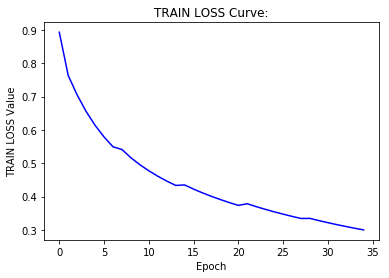

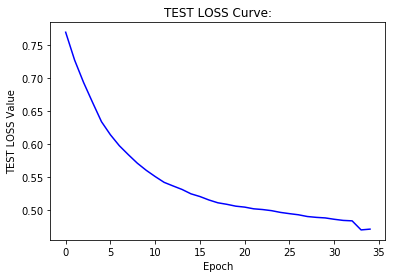

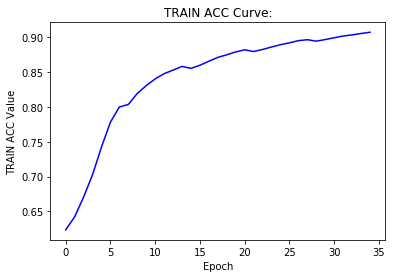

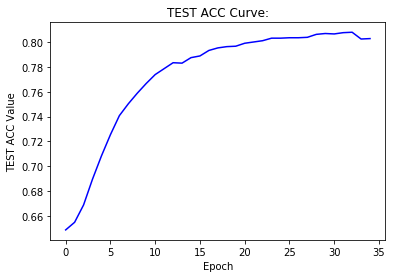

In [169]:
def show_curve(ys, title):
    x = np.array(range(len(ys)))
    y = np.array(ys)
    plt.plot(x, y, c='b')
    plt.axis()
    
    plt.title('{} Curve:'.format(title))
    plt.xlabel('Epoch')
    plt.ylabel('{} Value'.format(title))
    plt.show()
    
show_curve(fm_train_losses, 'TRAIN LOSS')
show_curve(fm_test_losses, 'TEST LOSS')
show_curve(fm_train_accs, 'TRAIN ACC')
show_curve(fm_test_accs, 'TEST ACC')

准确率在 0.80 ~ 0.81 左右

In [170]:
num_epochs = 6
batch_size = 64
lr = 5e-3
weight_decay = 1e-5
k = 100

device = torch.device("cuda:1")

clf_FM = FM(train_tfidfs.shape[1], k)
clf_FM.to(device)
optimizer = torch.optim.Adam(clf_FM.parameters(), lr=lr, weight_decay=weight_decay)
loss_fn = nn.CrossEntropyLoss()
kf = KFold(n_splits=5, shuffle=True, random_state=0)

fm_train_losses = []
fm_train_accs = []
fm_test_losses = []
fm_test_accs = []

for f, (train_index, val_index) in enumerate(kf.split(train_tfidfs)):
    print('Fold[{}]'.format(f+1))
    for epoch in range(num_epochs):
        clf_FM.train()
        fm_loss = 0
        fm_acc = 0
        for i in range(int(len(train_index)/batch_size)):
            batch_train_tfidfs = Variable(torch.FloatTensor(
                train_tfidfs[train_index][i*batch_size:i*batch_size+batch_size].toarray())).to(device)
            batch_train_targets = Variable(torch.LongTensor(
                train_targets[train_index][i*batch_size:i*batch_size+batch_size].map({
                    'negative': 0, 'neutral': 1, 'positive': 2
                }).values)).to(device)
            output = clf_FM(batch_train_tfidfs)
            
            loss = loss_fn(output, batch_train_targets)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            batch_train_predicts = torch.max(output, dim=1)[1]
            acc = accuracy_score(batch_train_targets.cpu(), batch_train_predicts.cpu())
            
            fm_loss += loss
            fm_acc += acc
            
        fm_loss = fm_loss/int(len(train_index)/batch_size)
        fm_acc = fm_acc/int(len(train_index)/batch_size)
        fm_train_losses.append(fm_loss)
        fm_train_accs.append(fm_acc)
        print('Epoch[{}/{}] Train loss: {:.4f}\tTrain acc: {:.4f}'.format(epoch+1, num_epochs, fm_loss, fm_acc))
        
        clf_FM.eval()
        with torch.no_grad():
            output = clf_FM(torch.FloatTensor(test_tfidfs.toarray()).to(device))
            fm_loss = loss_fn(output, torch.LongTensor(test_targets.map({
                'negative': 0, 'neutral': 1, 'positive': 2
            }).values).to(device))
            test_predicts = torch.max(output, dim=1)[1]
            fm_acc = accuracy_score(torch.LongTensor(test_targets.map({
                'negative': 0, 'neutral': 1, 'positive': 2
            }).values).cpu(), test_predicts.cpu())
            
            fm_test_losses.append(fm_loss)
            fm_test_accs.append(fm_acc)
            print('           Test loss: {:.4f}\tTest acc: {:.4f}'.format(fm_loss, fm_acc))

Fold[1]
Epoch[1/6] Train loss: 0.8348	Train acc: 0.6333
           Test loss: 0.7393	Test acc: 0.6592
Epoch[2/6] Train loss: 0.6707	Train acc: 0.6841
           Test loss: 0.6591	Test acc: 0.6889
Epoch[3/6] Train loss: 0.5686	Train acc: 0.7699
           Test loss: 0.6091	Test acc: 0.7319
Epoch[4/6] Train loss: 0.4986	Train acc: 0.8305
           Test loss: 0.5768	Test acc: 0.7565
Epoch[5/6] Train loss: 0.4482	Train acc: 0.8596
           Test loss: 0.5550	Test acc: 0.7773
Epoch[6/6] Train loss: 0.4100	Train acc: 0.8792
           Test loss: 0.5398	Test acc: 0.7855
Fold[2]
Epoch[1/6] Train loss: 0.4159	Train acc: 0.8680
           Test loss: 0.5269	Test acc: 0.7903
Epoch[2/6] Train loss: 0.3822	Train acc: 0.8836
           Test loss: 0.5186	Test acc: 0.7934
Epoch[3/6] Train loss: 0.3569	Train acc: 0.8939
           Test loss: 0.5129	Test acc: 0.7951
Epoch[4/6] Train loss: 0.3363	Train acc: 0.9030
           Test loss: 0.5089	Test acc: 0.7958
Epoch[5/6] Train loss: 0.3192	Train acc: 0.9

In [171]:
output = pd.DataFrame(data={'id':range(1, len(test_predicts.cpu())+1), 'polarity': test_predicts.cpu()})
output['polarity'] = output['polarity'].map({0: 'negative', 1: 'neutral', 2: 'positive'})
output.to_csv("./result/fm-apply-tfidf.csv", index=False)

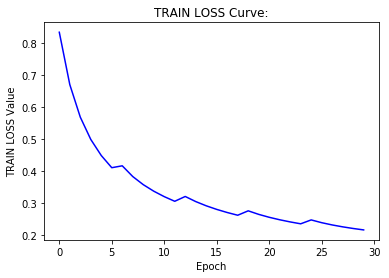

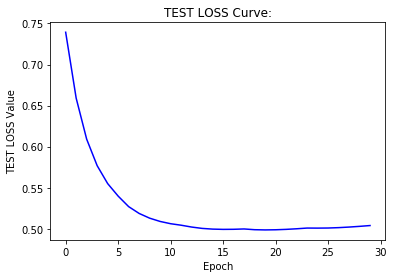

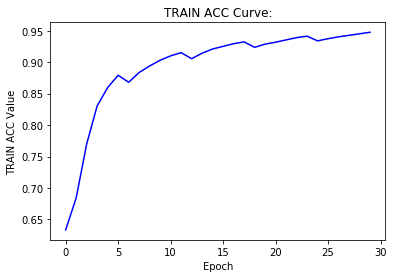

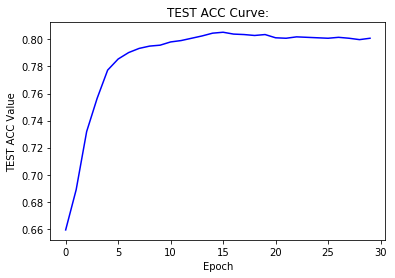

In [172]:
def show_curve(ys, title):
    x = np.array(range(len(ys)))
    y = np.array(ys)
    plt.plot(x, y, c='b')
    plt.axis()
    
    plt.title('{} Curve:'.format(title))
    plt.xlabel('Epoch')
    plt.ylabel('{} Value'.format(title))
    plt.show()
    
show_curve(fm_train_losses, 'TRAIN LOSS')
show_curve(fm_test_losses, 'TEST LOSS')
show_curve(fm_train_accs, 'TRAIN ACC')
show_curve(fm_test_accs, 'TEST ACC')

准确率在 0.80 左右